In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
X_train = x_train.reshape(60000, 784)
X_test = x_test.reshape(10000, 784)

In [5]:
from tensorflow.keras.utils import to_categorical

In [6]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [7]:
X_train = X_train / 255
X_test = X_test / 255

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(784,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3448 - accuracy: 0.9024 - val_loss: 0.2021 - val_accuracy: 0.9379
Epoch 2/10
938/938 [==============================] - 1s 1ms/step - loss: 0.1668 - accuracy: 0.9506 - val_loss: 0.1404 - val_accuracy: 0.9573
Epoch 3/10
938/938 [==============================] - 1s 1ms/step - loss: 0.1239 - accuracy: 0.9628 - val_loss: 0.1338 - val_accuracy: 0.9617
Epoch 4/10
938/938 [==============================] - 1s 1ms/step - loss: 0.1031 - accuracy: 0.9695 - val_loss: 0.1047 - val_accuracy: 0.9693
Epoch 5/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0877 - accuracy: 0.9733 - val_loss: 0.0994 - val_accuracy: 0.9693
Epoch 6/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0780 - accuracy: 0.9771 - val_loss: 0.1005 - val_accuracy: 0.9698
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0704 - accuracy: 0.9794 - val_loss: 0.1005 - val_accuracy: 0.9723
Epoch 

In [13]:
import numpy as np

In [14]:
X_train


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
y_train[:5, :]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [16]:
img0 = np.array(X_train[0]).reshape(1, 784)
model.predict(img0).argmax()


1/1 [==============================] - 0s 95ms/step


5

In [17]:
def recognise(img):
    img = np.array(img).reshape(1, 784)
    return model.predict(img).argmax()


In [18]:
y_pre = model.predict(X_test).argmax(axis=1)


313/313 [==============================] - 0s 780us/step


In [19]:
y_pre

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [20]:
len(y_pre)

10000

In [21]:
y_test.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [22]:
sum(y_pre == y_test.argmax(axis=1))

9737

In [23]:
9737 / 10000


0.9737

In [24]:
import matplotlib.pyplot as plt


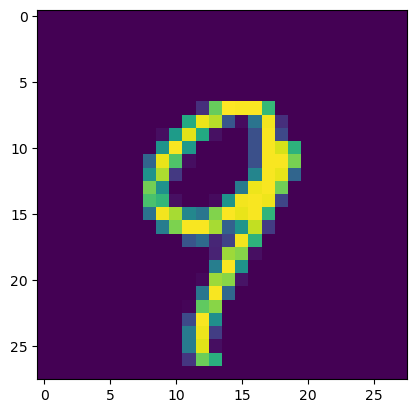

In [25]:
plt.imshow(np.array(X_test[560]).reshape(28, 28))


In [26]:
recognise(X_test[560])


1/1 [==============================] - 0s 14ms/step


9